# sklearn

#### classification
- regression (linear regression, logistic regression)
- SVM, decision tree, neural nets, nearest neighbors

#### clustering
- k-means, hierarchical clustering

#### model selection  - validate & choosing parameters & model
- cross validation, metrics

#### preprocessing
- feature extraction
- NumPy + Pandas

#### dimensionality reduction
- PCA, feature selection

## Linear regression

modeling between continuous dependent variable y & 1+ independent variable X  
**sklearn.linear_model.LinearRegression(fit_intercept = True, normalize = False, copy_X = True, n_jobs = 1)**
- fit_intercept : True(default) → calculate the intercept // False → no intercept (data already centered)
- normalize : False(default / fit_intercept = False) → no normalization // True → L2 norm 
- copy_X : True (default) → calculate with the original input data // False → calculate with (X - μ)
- n_jobs : 1 (default) // -1 → use all CPUs (# of CPUs for computation)

In [2]:
from random import *
import numpy as np
from sklearn import linear_model, datasets, neighbors
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
import pandas as pd

x: Python (10X1) 2D List  
 [[0], [1], [2], [3], [4], [5], [6], [7], [8], [9]]
y: Python (10X1) 2D List  
 [[1.3061102876366504], [1.8252310879152178], [8.547560517569604], [5.426614391749974], [5.778430383313298], [9.141182136249666], [0.38990474226731964], [3.3359253997692564], [8.212868820623527], [7.756100442299729]]


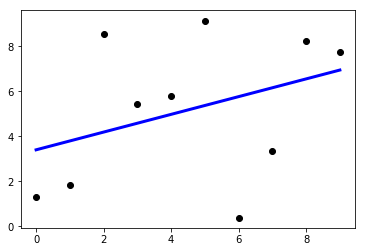

In [3]:
# regr.fit(X, y) → both X and y need to be same length 2D structure
# with Python 2D List

length = 10
x = []
y = []
for i in range(length):
    x.append([i])
    y.append([random()*10])
print('x: Python (10X1) 2D List ', '\n', x)
print('y: Python (10X1) 2D List ', '\n', y)

regr = linear_model.LinearRegression()
regr.fit(x, y)

plt.scatter(x, y, color ='black')
plt.plot(x, regr.predict(x), color = 'blue', linewidth = 3)
# plt.show()

x: Numpy (10X1) 2D Array:  
 array( 
 [[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]] )
y: Numpy (10X1) 2D Array:  
 array( 
 [[8.55247204]
 [9.72299547]
 [9.99179936]
 [1.68297348]
 [5.14803736]
 [9.09797725]
 [5.49795459]
 [9.63339251]
 [5.98850283]
 [3.6622706 ]] )


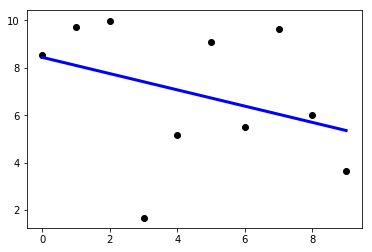

In [6]:
# with NumPy 2D array

x = np.arange(length).reshape(-1, 1)
y = np.array([random() * 10 for i in range(length)]).reshape(-1, 1)
print('x: Numpy (10X1) 2D Array: ', '\n', 'array(', '\n', x, ')')
print('y: Numpy (10X1) 2D Array: ', '\n', 'array(', '\n', y, ')')

regr = linear_model.LinearRegression()
regr.fit(x, y)

plt.scatter(x, y, color ='black')
plt.plot(x, regr.predict(x), color = 'blue', linewidth = 3)
# plt.show()

xy_data : Numpy (10X2) 2D Array  
 array( 
 [[0.         8.55247204]
 [1.         9.72299547]
 [2.         9.99179936]
 [3.         1.68297348]
 [4.         5.14803736]
 [5.         9.09797725]
 [6.         5.49795459]
 [7.         9.63339251]
 [8.         5.98850283]
 [9.         3.6622706 ]] )

p_data : Pandas (10X2) DataFrame:  
      x         y
0  0.0  8.552472
1  1.0  9.722995
2  2.0  9.991799
3  3.0  1.682973
4  4.0  5.148037
5  5.0  9.097977
6  6.0  5.497955
7  7.0  9.633393
8  8.0  5.988503
9  9.0  3.662271

p_data.x : Pandas (10X1) DataFrame:  
 0    0.0
1    1.0
2    2.0
3    3.0
4    4.0
5    5.0
6    6.0
7    7.0
8    8.0
9    9.0
Name: x, dtype: float64
p_data.y : Pandas (10X1) DataFrame:  
 0    8.552472
1    9.722995
2    9.991799
3    1.682973
4    5.148037
5    9.097977
6    5.497955
7    9.633393
8    5.988503
9    3.662271
Name: y, dtype: float64

p_data.x.values : Numpy 1D Array:  
 array( 
 [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.] )
p_data.y.values : Numpy 1D Array:  
 arr

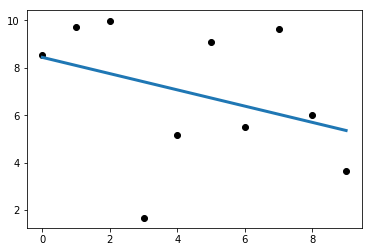

In [21]:
# pandas DataFrame→ requires numpy 2D array

xy_data = np.concatenate((x, y), axis = 1) # x and y same shape
print('xy_data : Numpy (10X2) 2D Array ', '\n', 'array(', '\n', xy_data, ')')
print()

p_data = pd.DataFrame(data = xy_data, columns = ('x', 'y'))
print('p_data : Pandas (10X2) DataFrame: ', '\n', p_data)
print()
print('p_data.x : Pandas (10X1) DataFrame: ', '\n', p_data.x)
print('p_data.y : Pandas (10X1) DataFrame: ', '\n', p_data.y)
print()
print('p_data.x.values : Numpy 1D Array: ', '\n', 'array(', '\n', p_data.x.values, ')')
print('p_data.y.values : Numpy 1D Array: ', '\n', 'array(', '\n', p_data.y.values, ')')
print()

# for regr.fit() you cannot put in a series, but a 2D array
x_regr = p_data.x.values.reshape(-1, 1)
y_regr = p_data.y.values

regr = linear_model.LinearRegression()
regr.fit(x_regr, y_regr)

plt.scatter(x_regr, y_regr, color = 'black')
plt.plot(x_regr, regr.predict(x_regr), linewidth = 3)

In [13]:
# load the diabetes dataset
diabetes = datasets.load_diabetes()
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [30]:
# use only one feature
diabetes_X = diabetes.data[:,  np.newaxis, 2]
diabetes_X

array([[ 0.0612233 ],
       [-0.05194697],
       [ 0.04397831],
       [-0.01206792],
       [-0.0368576 ],
       [-0.04116885],
       [-0.04763572],
       [-0.00236761],
       [ 0.0612233 ],
       [ 0.03858925],
       [-0.08428133],
       [ 0.01703301],
       [-0.02931291],
       [-0.00236761],
       [-0.02607948],
       [-0.01853479],
       [ 0.04182268],
       [ 0.01164395],
       [-0.01099011],
       [-0.01853479],
       [-0.05733603],
       [-0.02284604],
       [-0.00452324],
       [ 0.06014549],
       [ 0.03535581],
       [-0.01314573],
       [-0.07781446],
       [ 0.05906768],
       [-0.02176823],
       [-0.00667886],
       [ 0.04397831],
       [-0.06595852],
       [ 0.12481421],
       [-0.05086915],
       [-0.0638029 ],
       [-0.03146854],
       [ 0.02242207],
       [ 0.01056613],
       [ 0.07092361],
       [ 0.01379957],
       [-0.00883448],
       [-0.06811415],
       [-0.01099011],
       [-0.02392385],
       [ 0.06769017],
       [-0

In [31]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

In [32]:
# Create linear regression object
regr = linear_model.LinearRegression(copy_X = 0)

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

regr

LinearRegression(copy_X=0, fit_intercept=True, n_jobs=1, normalize=False)

**regr.fit(X, y, sample_weight = None)**
- X :  2D
- y : 1D
- sample_weight : ?

In [33]:
# The coefficients
print('Coefficients : \n', regr.coef_)

# The intercept
print('Intercept: \n', regr.intercept_)

# The mean squared error
print('Mean squared error: %.2f' % np.mean((regr.predict(diabetes_X_test)- diabetes_y_test) ** 2))
# Explained variance score: 1 is the perfect prediction
print('Variance score: %.2f' % regr.score(diabetes_X_test, diabetes_y_test))

Coefficients : 
 [938.23786125]
Intercept: 
 153.36255924170615
Mean squared error: 2563.67
Variance score: 0.47


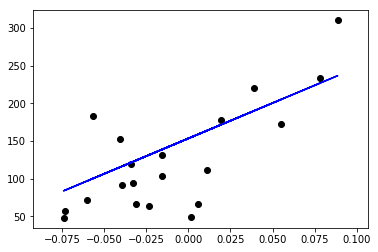

In [34]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color = 'black')
plt.plot(diabetes_X_test, regr.predict(diabetes_X_test), color = 'blue')

## K-Nearest Neighbors (KNN) Classifier

- assume that similar data will be located closely
- determine the new data based on k closest data (the class of the majority of the k closest data = the class of the new data)
- no model, only data is used
- various distance metrics: Euclidean, Manhattan, Mahalanobis distance (optimal)
- DISTANCE vs. COUNT  
  
**from sklearn import neighbors**
  
**sklearn.neighbors.KNeighborsClassifier(****kwargs)
- n_neighbors(5): # of neighbors to use
- weights: {uniform (default), distance, user-defined-function} weight function for prediction
- Algorithm: algorithm to compute nearest neighbors {auto, ball_tree, kd_tree, brute}
- leaf_size: leaf size for ball/KD tree
- Metric(minkowski): distance metric
- p: power parameter for minkowski metric // 1 → L1, 2 → L2, n → Ln
- n_jobs

In [3]:
# determine the value of k
n_neighbors = 15

# import some data to play with 
iris = datasets.load_iris()
X = iris.data[:, :2] # we only take the first two features. We could avoid this ugly slicing by using a two-dim dataset
y = iris.target

h = .02 # step size in the mesh

In [4]:
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [5]:
# We create an instance of Neighbors Classifier anad fit the data
clf = neighbors.KNeighborsClassifier(n_neighbors, weights = 'uniform')
clf.fit(X, y)

clf

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

In [6]:
new_point = np.array([[3.7, 4.5]])
iris_class = clf.predict(new_point)

iris_class

array([0])

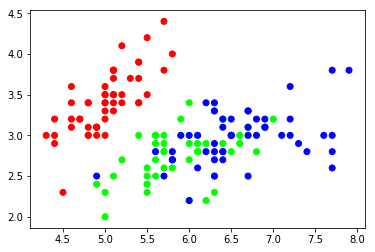

In [7]:
plt.scatter(X[:, 0], X[:,1], c = y, cmap = cmap_bold)

In [8]:
# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

x_min, x_max, y_min, y_max

(3.3, 8.9, 1.0, 5.4)

In [9]:
# Assign a color to each point in the mesh [x_min, x_max] x [y_min, y_max]
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
xx[:2, :5], xx.shape, yy[:2, :5], yy.shape

(array([[3.3 , 3.32, 3.34, 3.36, 3.38],
        [3.3 , 3.32, 3.34, 3.36, 3.38]]),
 (220, 280),
 array([[1.  , 1.  , 1.  , 1.  , 1.  ],
        [1.02, 1.02, 1.02, 1.02, 1.02]]),
 (220, 280))

In [11]:
xr = xx.ravel()
yr = yy.ravel()

xr, xr.shape, yr, yr.shape

(array([3.3 , 3.32, 3.34, ..., 8.84, 8.86, 8.88]),
 (61600,),
 array([1.  , 1.  , 1.  , ..., 5.38, 5.38, 5.38]),
 (61600,))

In [12]:
# np.c_[x, y] same as np.concatenate(x, y)
xy = np.c_[xr, yr]
xy, xy.shape

(array([[3.3 , 1.  ],
        [3.32, 1.  ],
        [3.34, 1.  ],
        ...,
        [8.84, 5.38],
        [8.86, 5.38],
        [8.88, 5.38]]), (61600, 2))

In [14]:
np.c_[np.array([1, 2, 3]), np.array([4, 5, 6])]

array([[1, 4],
       [2, 5],
       [3, 6]])

[[0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 ...
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]] (220, 280)


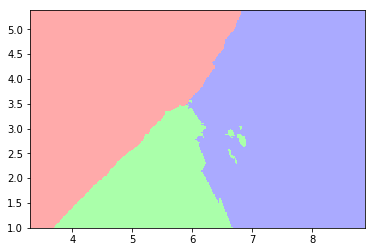

In [13]:
Z = clf.predict(xy).reshape(xx.shape)
print(Z, Z.shape)
plt.pcolormesh(xx, yy, Z, cmap = cmap_light)

pcolormesh(C)  
pcolormesh(X, Y, Z)  

returns: matplotlib.collections.QuadMesh  
x : x axis // y : y axis // z : class  
\*\*kwarg ->  cmap (Colormap) # cmap_light = ListedColormap(['color', 'color', 'in #FFFFFF rgb'])


Text(0.5,1,'3-Class Classification (k = 15, weights = "uniform")')

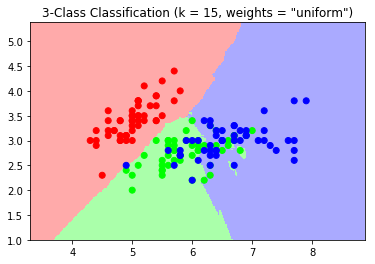

In [53]:
plt.pcolormesh(xx, yy, Z, cmap = cmap_light)
plt.scatter(X[:, 0], X[:,1], c = y, cmap = cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('3-Class Classification (k = %i, weights = "uniform")' % (n_neighbors))